<a href="https://colab.research.google.com/github/xuziyue/tensorflow-models/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.9MB 26.3MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
from absl import logging
logging.set_verbosity(logging.ERROR)

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

2.5.0


In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [10]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ClassLabel(shape=(), dtype=tf.int64, num_classes=10)


In [19]:
def normalize(image, labels):
  images = tf.cast(image, tf.float32)
  images /= 255
  return images, labels

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [35]:
 for image, label in test_dataset.take(1):
   break
image = image.numpy().reshape((28, 28))

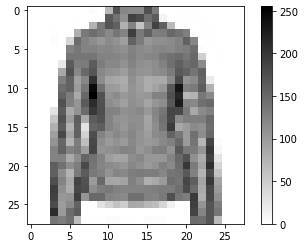

In [36]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()